# Mix designs: OPC7% & OPC9%

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_tga_dtg_zone(
    tga_file: str,
    dtg_file: str,
    x_start: float,
    x_end: float,
    skiprows: int = 30
) -> float:
    """
    Loads TGA and DTG CSV files, plots them together, shades a temperature window
    between x_start and x_end, shades the corresponding TGA weight-difference
    region on the y-axis, annotates ΔWeight, and returns the weight difference.

    Parameters
    ----------
    tga_file : str
        Path to the TGA CSV (no header, skiprows rows of metadata).
    dtg_file : str
        Path to the DTG CSV (header=0, skiprows rows of metadata).
    x_start : float
        Lower temperature bound of the shaded zone (°C).
    x_end : float
        Upper temperature bound of the shaded zone (°C).
    skiprows : int, optional
        Number of rows to skip at the top of each CSV, by default 30

    Returns
    -------
    float
        The difference in TGA weight (%) between x_start and x_end.
    """
    # --- 1. LOAD & CLEAN TGA DATA ---
    df_tga = pd.read_csv(
        tga_file,
        encoding="ISO-8859-1",
        skiprows=skiprows,
        header=None
    )
    ncols = df_tga.shape[1]
    cols = ["Temperature", "Time", "Value", "Weight%"] + \
           [f"Other{i}" for i in range(1, ncols - 3)]
    df_tga.columns = cols
    df_tga = df_tga[["Temperature", "Weight%"]].dropna()
    df_tga["Temperature"] = pd.to_numeric(df_tga["Temperature"], errors="coerce")
    df_tga["Weight%"]     = pd.to_numeric(df_tga["Weight%"],     errors="coerce")

    # --- 2. LOAD & CLEAN DTG DATA ---
    df_dtg = pd.read_csv(
        dtg_file,
        encoding="ISO-8859-1",
        skiprows=skiprows,
        header=0
    )
    df_dtg.columns = [
        "Temperature", "Time", "DSC", "Mass%",
        "GasFlow1", "GasFlow2", "GasFlow3",
        "DTG", "Sensitivity"
    ]
    df_dtg = df_dtg[["Temperature", "DTG"]].dropna()
    df_dtg["Temperature"] = pd.to_numeric(df_dtg["Temperature"], errors="coerce")
    df_dtg["DTG"]         = pd.to_numeric(df_dtg["DTG"],         errors="coerce")

    # --- 3. INTERPOLATE TGA WEIGHT AT x_start & x_end ---
    w_start     = np.interp(x_start, df_tga["Temperature"], df_tga["Weight%"])
    w_end       = np.interp(x_end,   df_tga["Temperature"], df_tga["Weight%"])
    weight_diff = w_start - w_end

    # --- 4. PLOT EVERYTHING ---
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # TGA curve
    ax1.plot(
        df_tga["Temperature"],
        df_tga["Weight%"],
        color="tab:blue",
        linewidth=2,
        label="TGA (Weight%)"
    )
    ax1.set_xlabel("Temperature (°C)")
    ax1.set_ylabel("Weight (%)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # vertical temperature window
    ax1.axvspan(x_start, x_end, color="gray", alpha=0.3)

    # horizontal weight region
    ymin, ymax = sorted([w_start, w_end])
    ax1.axhspan(ymin, ymax, color="tab:blue", alpha=0.2)

    # annotate ΔWeight
    xlim = ax1.get_xlim()
    x_annot = xlim[0] + 0.02 * (xlim[1] - xlim[0])
    y_mid = (w_start + w_end) / 2
    ax1.text(
        x_annot, y_mid,
        f"ΔWeight = {weight_diff:.2f}%",
        color="tab:blue",
        fontsize=11,
        va="center",
        bbox=dict(facecolor="white", edgecolor="tab:blue", alpha=0.5, boxstyle="round")
    )

    # DTG curve on twin axis
    ax2 = ax1.twinx()
    ax2.plot(
        df_dtg["Temperature"],
        df_dtg["DTG"],
        color="tab:red",
        linestyle="--",
        linewidth=2,
        label="DTG (%/min)"
    )
    ax2.set_ylabel("DTG (%/min)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc="upper right")

    plt.title("Overlaid TGA & DTG with Highlighted Zones")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # return the weight difference
    return weight_diff

In [ ]:
tg_path = "/mnt/data/TG_ExpDat_A8%DC28; 14-2-2025-2.csv"
dtg_path = "/mnt/data/DG_ExpDat_A8%DC28; 14-2-2025-2.csv"

tg_df, dtg_df, dtg_s, events_df, bands_df = analyze_timepoint(
    tg_path, dtg_path, smooth_window=21, sample="b30s70a8%", timepoint="DC28"
)

# 1) Weight loss between each DTG-zero-crossing event:
display(events_df)

# 2) Fixed-band metrics (includes R1_Tpeak ... R5_Tpeak and dW):
display(bands_df)

# 3) Optional plot:
plot_with_events(tg_df, dtg_df, events_df, title="b30s70a8% — DC28")


NameError: name 'analyze_timepoint' is not defined

## OPC7%: Before carbonation:

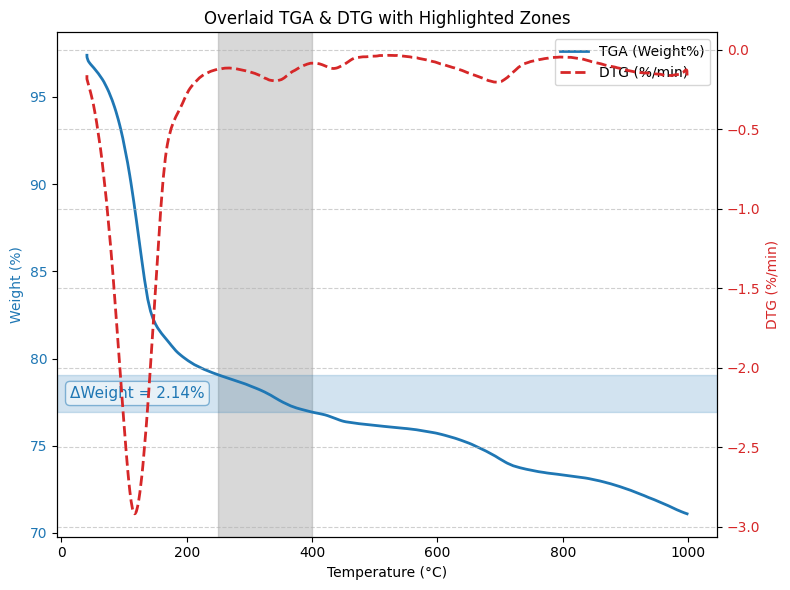

In [4]:
plot_tga_dtg_zone("TG_ExpDat_OPC7%D28; 13-1-2025-2.csv","DG_ExpDat_OPC7%D28; 13-1-2025-2.csv",250,400);


## OPC7%: After carbonation (DC 14 BECAUSE DC28 DATA ERROR)

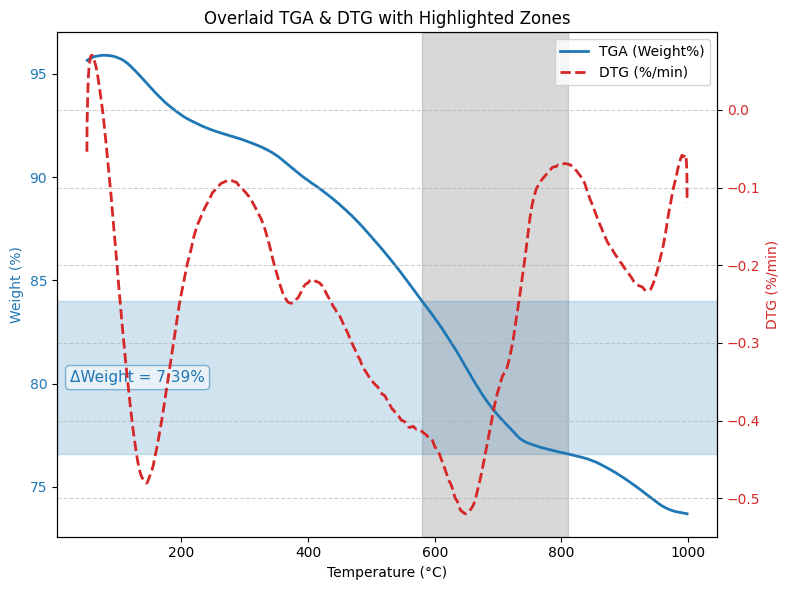

In [ ]:
plot_tga_dtg_zone("TG_ExpDat_OPC7%DC14; 30-1-2025-2.csv","DG_ExpDat_OPC7%DC14; 30-1-2025-2.csv",580,810);

## OPC9%: Before carbonation

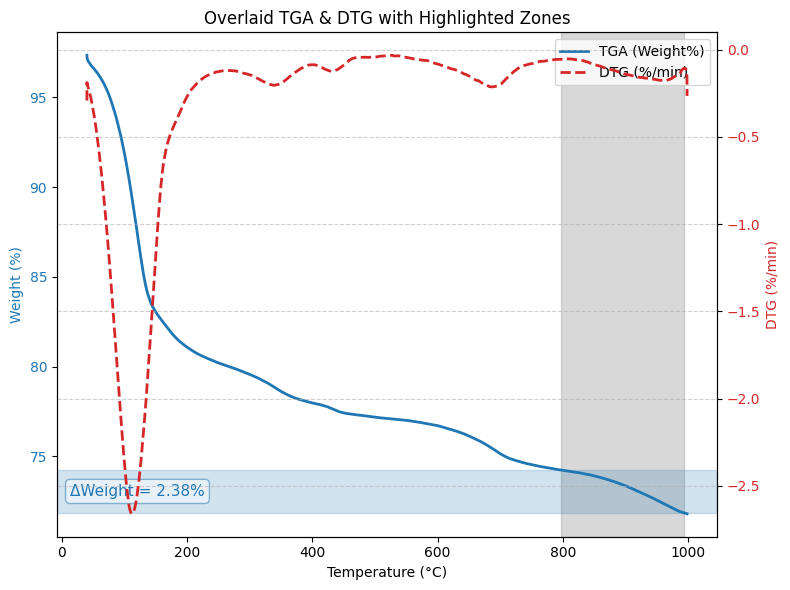

In [ ]:
plot_tga_dtg_zone("TG_ExpDat_OPC9%D28; 13-1-2025-2.csv","DG_ExpDat_OPC9%D28; 13-1-2025-2.csv",797,993);

## OPC9%: After carbonation

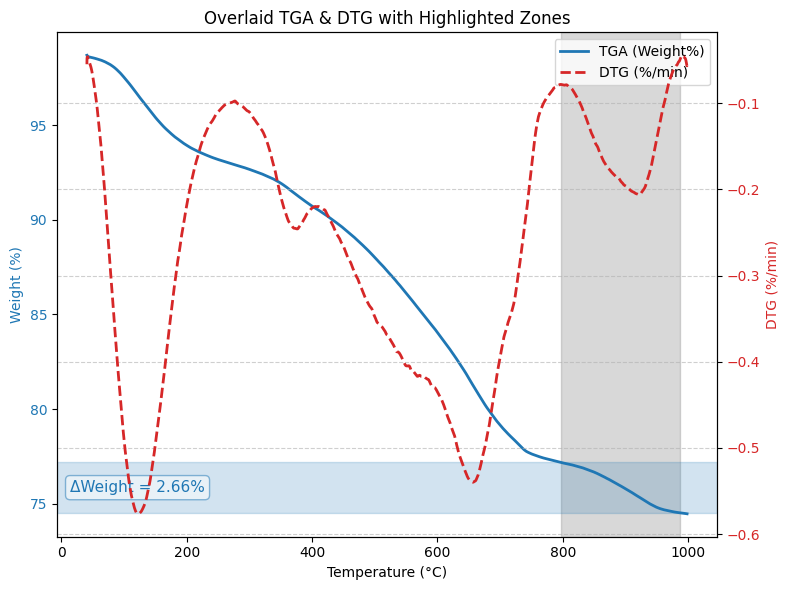

In [ ]:
plot_tga_dtg_zone("TG_ExpDat_OPC9%DC28; 13-2-2025-2.csv","DG_ExpDat_OPC9%DC28; 13-2-2025-2.csv",797,987);